# Équations prédation / proie de Lotka-Volterra
Reference : https://fr.wikipedia.org/wiki/%C3%89quations_de_pr%C3%A9dation_de_Lotka-Volterra 

On considère un système de deux espèces, l'une est une proie (ex : lapin), l'autre prédatrice (ex : renard). On suppose que la population de lapins se reproduit de manière proportionnelle à sa population actuelle et diminue en fonction du nombre de prédateurs. Il n'y a pas de limitation de nourriture pour la population de lapins ou de facteurs extérieurs qui influenceraient sur leur nombre. 

La population de renards augmente proportionnellement au nombre de proies disponibles et diminue selon un taux de mortalité fixe.
 
On note $x(t)$ le nombre de proies et $y(t)$ le nombre de prédateurs à l'instant $t$. Les équations de Lotka-Volterra sont les suivantes :

$$
\begin{cases}
\frac{dx}{dt} = \alpha x - \beta x y \\
\frac{dy}{dt} = \delta x y - \gamma y
\end{cases}

$$

où $\alpha$ (taux de natalité des lapins), $\beta$ (taux de mortalité lié aux prédateurs), $\gamma$ (taux de mortalité des prédateurs) et $\delta$ (~taux de natalité des prédateurs) sont des constantes positives.



## Evolution de la population de proies en l'absence de prédateurs
Supposons qu'il n'y a pas de prédateurs pour une première population de lapins. L'équation différentielle devient alors :
$$
\frac{dx}{dt} = \alpha x
$$
Cette équation est une équation différentielle linéaire du premier ordre. Sa solution est de la forme $x(t) = x_0 e^{\alpha t}$ où $x_0$ est le nombre initial de lapins.
On illustre ici cette evolution. On supposera ici que la population initiale de lapins est de 10 individus et que le taux de natalité est de 0.1 (par unité de temps).

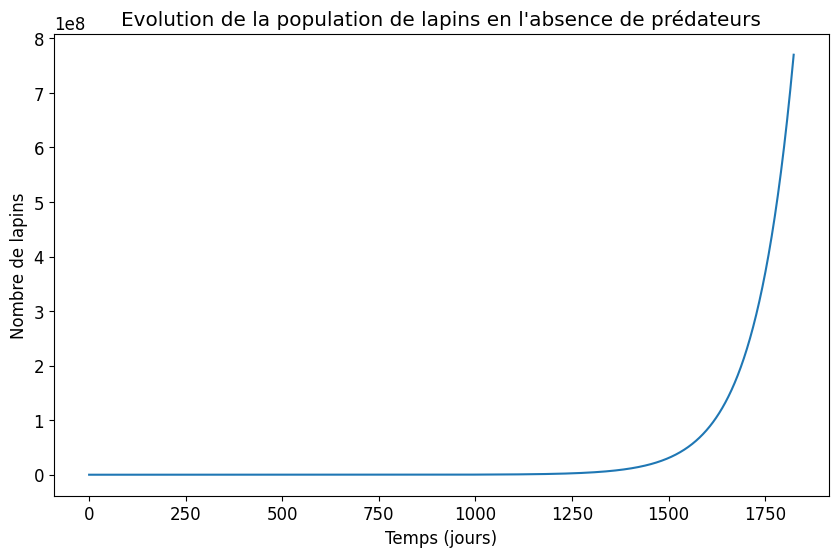

In [15]:
import  numpy as np
import matplotlib.pyplot as plt
# Taille de police et taille de figure
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize': (10, 6)})

dt = 1 # Pas de temps, un jour
t_range = np.arange(0, 5 * 365, dt) # Cinq années
x_range = np.zeros(t_range.shape) # Tableau contenant la population de lapins en fonction du temps.
alpha = 0.01 # Taux de natalité des lapins par jour
x0 = 10 # Population initiale de lapins

# Calcul de la population de lapins en fonction du temps
x = x0
for t in t_range:
    dx = x * alpha * dt
    x = x + dx
    x_range[t] = x

#
plt.title("Evolution de la population de lapins en l'absence de prédateurs")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre de lapins")
plt.plot(t_range, x_range)

On peut voir que la population de lapins augmente exponentiellement en l'absence de prédateurs passe de 10 à  $8.10^8$ individus (!) après 5 ans (toujours avec l'hypothèse d'une source de nourriture illimitée).

## Evolution de la population de proies en présence de prédateurs
On considère maintenant que les lapins sont en présence de renards. On suppose que la population initiale de lapins est de 10 individus et que la population initiale de renards est de 5 individus. On suppose que les paramètres sont les suivants : $\alpha = 0.01$, $\beta = 0.01$, $\gamma = 0.01$ et $\delta = 0.001$.


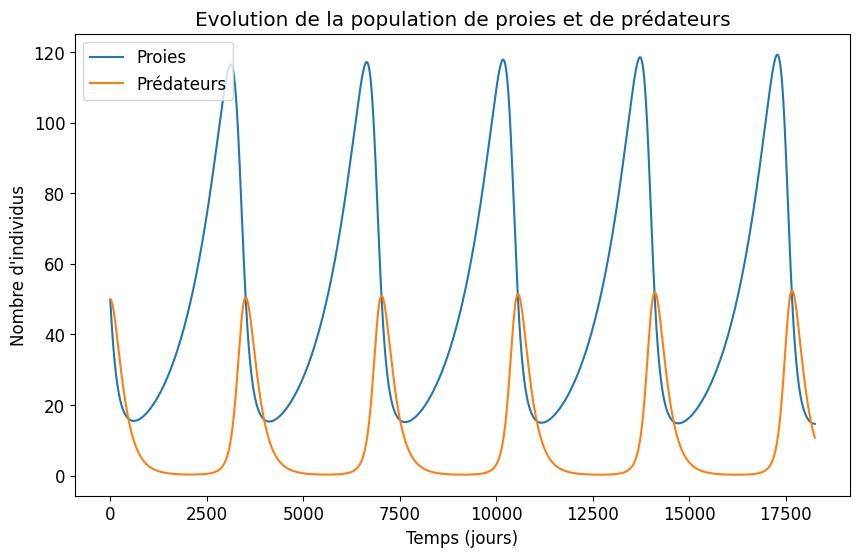

In [195]:
dt = 1 # Pas de temps, un jour
t_range = np.arange(0, 50 * 365, dt) # Cinquante années
x_range = np.zeros(t_range.shape) # Tableau contenant la population de lapins en fonction du temps.
y_range = np.zeros(t_range.shape) # Tableau contenant la population de renards en fonction du temps.


## A MODIFIER
alpha = 0.001 # Taux de natalité des lapins par jour
beta = 0.0001 # Taux de mortalité des lapins par prédateur
gamma = 0.005 # Taux de mortalité des prédateurs
delta = 0.0001 # Taux de natalité des prédateurs
x0 = 50 # Population initiale de lapins
y0 = 50 # Population initiale de renards

# Calcul de la population de lapins et renards en fonction du temps
x = x0
y = y0
for t in t_range:
    dx = (alpha * x - beta * x * y) * dt
    dy =  (delta * x * y - gamma * y) * dt
    x = x + dx
    y = y + dy
    x_range[t] = x
    y_range[t] = y
    

plt.title("Evolution de la population de proies et de prédateurs")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus")
plt.plot(t_range, x_range, label="Proies")
plt.plot(t_range, y_range, label="Prédateurs")
plt.legend()
plt.show()


## Questions
- Comment évoluent les populations en fonctions des facteurs de natalités et mortalité ?
- Est il possible d'avoir une cohabitation stable des deux espèces ? Pour quelles valeurs ? 
- Si elle existe, cette cohabitation est elle un équilibre stable ou instable ?



## Ajout d'une troisième espèce 
On considère maintenant une espèce tierce : un insect imaginaire qui affaiblit les renards mais qui est une source de nourriture pour les lapins. On suppose que la population initiale de lapins est de 10 individus, que la population initiale de renards est de 5 individus et que la population initiale d'insectes est de 100 individus. 

- Comment cet eco système va évoluer au cours du temps ?
- Que se passe t il si cet insecte attaque les lapins et les renards ? Seulement les lapins et est une source de nourriture pour les renards ? 


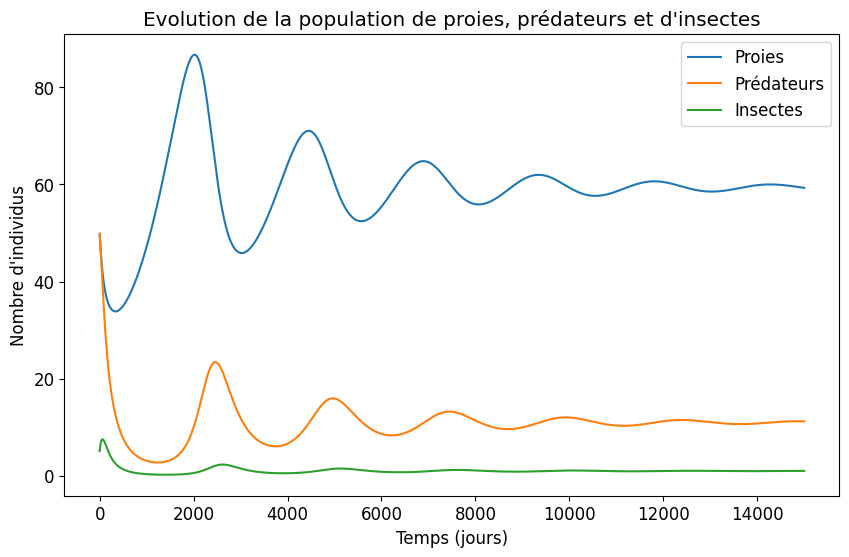

In [213]:
plt.clf()
dt = 1 # Pas de temps, un jour
t_range = np.arange(0, 50 * 300, dt) # Dix années
x_range = np.zeros(t_range.shape) # Tableau contenant la population de lapins en fonction du temps.
y_range = np.zeros(t_range.shape) # Tableau contenant la population de renards en fonction du temps.
z_range = np.zeros(t_range.shape) # Tableau contenant la population d'insectes en fonction du temps.


alpha = 0.001 # Taux de natalité des lapins par jour
beta = 0.0001 # Taux de mortalité des lapins par prédateur
gamma = 0.005 # Taux de mortalité des prédateurs
delta = 0.0001 # Taux de natalité des prédateurs
beta2 = 0.0004

x0 = 50 # Population initiale de lapins
y0 = 50 # Population initiale de renards
z0 = 5 # Population initiale d'insectes
# Calcul de la population de lapins et renards en fonction du temps
x = x0
y = y0
z = z0
for t in t_range:
    dx = (alpha * x + delta * z * x -  beta * x * y) * dt
    dy = ( delta * x * y -  delta * x * z - gamma * y -  beta2 * y * z) * dt
    dz = ( - 10 * delta * x * z + gamma * y + beta2 * y * z) * dt  # Ajustement manuel ici pour trouver un régime intéressant...
    
    x = max(x + dx, 0)
    y = max (y + dy, 0)
    z = max (z + dz, 0 )
    x_range[t] = x
    y_range[t] = y
    z_range[t] = z

plt.title("Evolution de la population de proies, prédateurs et d'insectes")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus")
plt.plot(t_range, x_range, label="Proies")
plt.plot(t_range, y_range, label="Prédateurs")
# set log scale
plt.plot(t_range, z_range, label="Insectes")
# plt.yscale('log')

plt.legend()
plt.show()